# Обучение без учителя в Scikit-learn

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [51]:
from sklearn.datasets import load_boston

boston = load_boston()

data = boston["data"]

feature_names = boston["feature_names"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(boston["target"], columns=["price"])

display(X.head()), display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


(None, None)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


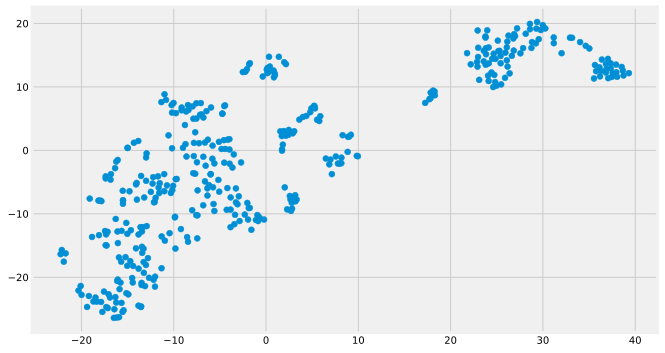

In [55]:
from pylab import rcParams

plt.rcParams['figure.figsize'] = 10, 6

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [56]:
from sklearn.cluster import KMeans

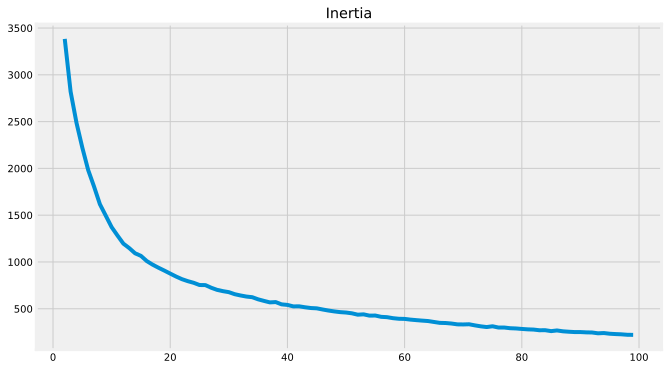

In [57]:
inertias = []

max_iter = 100
for i in range(2, max_iter):
    temp_model = KMeans(n_clusters=i, random_state=42)
    temp_model.fit(X_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, max_iter), inertias)

plt.title('Inertia')

plt.show()

inertion на графике начинает выравниваться на 17 кластерах, используем данное значение в гиперпараметрах модели

Text(0.5, 1.0, 'Train clustered')

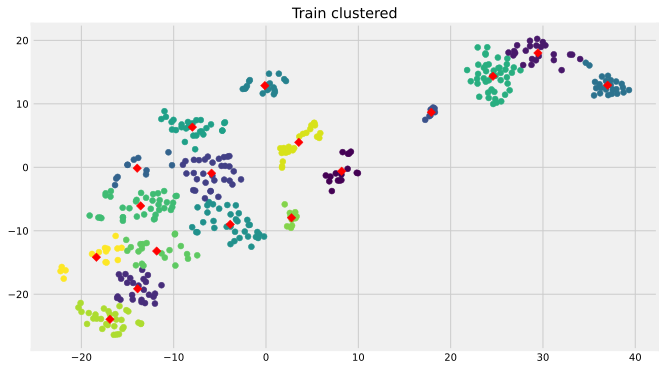

In [58]:
model = KMeans(n_clusters=17, random_state=42)

train_labels = model.fit_predict(X_train_tsne)

centers = model.cluster_centers_

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.title('Train clustered')

In [59]:
def summary(data):
    return data.groupby(['Cluster'], as_index=False).agg({'price':'mean', 'CRIM':'mean'})\
               .rename(columns={'price':'MeanPrice', 'CRIM': 'MeanCRIM'})

summary(pd.concat([X_train, pd.DataFrame(train_labels, columns=['Cluster']), y_train], axis=1))

,Cluster,MeanPrice,MeanCRIM
0,0.0,23.662500,2.156072
1,1.0,22.095455,1.568839
2,2.0,22.945000,7.046766
3,3.0,23.654167,1.453769
4,4.0,26.260000,0.169306
5,5.0,25.740000,0.923443
6,6.0,23.780000,1.377391
7,7.0,28.175000,2.585901
8,8.0,25.721429,1.479126
9,9.0,24.171429,2.669954


### Задание 3 
Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
Выполните, пожалуйста, если возникнут проблемы при отправке решения - пишите, пожалуйста.

In [60]:
test_labels = model.fit_predict(X_test)

In [61]:
summary(pd.concat([X_test, pd.DataFrame(test_labels, columns=['Cluster']), y_test], axis=1))

,Cluster,MeanPrice,MeanCRIM
0,0.0,19.466667,0.341773
1,1.0,25.160000,0.268740
2,2.0,NaN,NaN
3,3.0,24.200000,0.088260
4,4.0,21.800000,0.128630
5,5.0,30.800000,0.027630
6,6.0,19.116667,0.454337
7,7.0,20.900000,0.128160
8,8.0,22.650000,0.071760
9,9.0,NaN,NaN
